In [1]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F55D3E8DF28>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


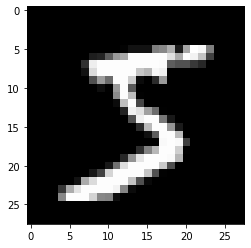

In [7]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


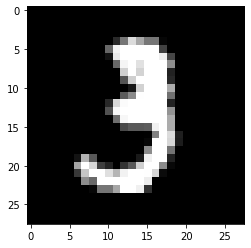

In [8]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [9]:
import torchvision.transforms as transforms

In [10]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [11]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [12]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


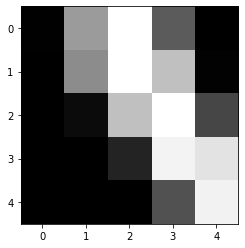

In [13]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

In [14]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [15]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [16]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [17]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0165, -0.0123, -0.0112,  ..., -0.0061, -0.0067,  0.0126],
        [-0.0126, -0.0151, -0.0179,  ...,  0.0174, -0.0142, -0.0056],
        [-0.0329,  0.0078,  0.0051,  ..., -0.0174,  0.0195, -0.0332],
        ...,
        [ 0.0174,  0.0021,  0.0265,  ...,  0.0103, -0.0233, -0.0329],
        [ 0.0342, -0.0208, -0.0192,  ..., -0.0144,  0.0161, -0.0344],
        [ 0.0246, -0.0214, -0.0131,  ...,  0.0272, -0.0350, -0.0172]],
       requires_grad=True)

In [18]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0277, -0.0104, -0.0014,  0.0176,  0.0140, -0.0211, -0.0281,  0.0291,
        -0.0160,  0.0223], requires_grad=True)

In [19]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break

tensor([4, 7, 6, 6, 2, 4, 7, 1, 3, 1, 3, 5, 5, 1, 4, 8, 1, 0, 2, 4, 8, 0, 1, 9,
        6, 0, 5, 3, 2, 8, 8, 0, 4, 4, 1, 3, 9, 9, 1, 3, 1, 6, 3, 7, 5, 7, 0, 2,
        9, 4, 9, 9, 2, 9, 4, 9, 8, 1, 3, 1, 7, 2, 2, 4, 3, 7, 2, 0, 0, 7, 4, 6,
        8, 1, 0, 6, 3, 4, 2, 8, 0, 1, 2, 4, 9, 8, 0, 1, 8, 3, 6, 5, 5, 8, 7, 1,
        4, 8, 9, 7, 0, 0, 0, 7, 0, 0, 8, 3, 3, 3, 4, 8, 7, 5, 9, 5, 7, 8, 2, 4,
        6, 7, 5, 9, 4, 5, 1, 6])
torch.Size([128, 1, 28, 28])


RuntimeError: ignored

In [20]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [21]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0051,  0.0317, -0.0132,  ...,  0.0308,  0.0019,  0.0340],
         [-0.0175, -0.0333, -0.0244,  ...,  0.0285, -0.0332,  0.0309],
         [ 0.0235,  0.0010, -0.0070,  ...,  0.0243, -0.0306,  0.0216],
         ...,
         [ 0.0220,  0.0222,  0.0120,  ..., -0.0098, -0.0266, -0.0260],
         [-0.0250,  0.0310, -0.0059,  ..., -0.0095,  0.0356, -0.0067],
         [-0.0225,  0.0312, -0.0300,  ...,  0.0289, -0.0212, -0.0208]],
        requires_grad=True), Parameter containing:
 tensor([-0.0176, -0.0154, -0.0221,  0.0310,  0.0047,  0.0201,  0.0165,  0.0098,
          0.0173, -0.0142], requires_grad=True)]

In [22]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.0864, -0.1813, -0.2185,  0.0342, -0.1679,  0.4088,  0.1957,  0.0375,
          0.3260, -0.3505],
        [-0.0551, -0.1956, -0.0293,  0.0346, -0.6192,  0.2361,  0.3150,  0.1537,
          0.2025,  0.1092]])


In [23]:
import torch.nn.functional as F

In [24]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0892, 0.0811, 0.0782, 0.1006, 0.0822, 0.1463, 0.1183, 0.1009, 0.1347,
         0.0685],
        [0.0905, 0.0786, 0.0929, 0.0990, 0.0515, 0.1211, 0.1311, 0.1115, 0.1171,
         0.1067]])
Sum:  1.0000001192092896


In [25]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([5, 6, 5, 5, 7, 7, 6, 8, 8, 8, 3, 8, 8, 8, 8, 8, 8, 6, 8, 8, 8, 6, 6, 5,
        6, 8, 6, 3, 6, 0, 6, 8, 6, 8, 6, 3, 6, 6, 6, 6, 8, 6, 3, 8, 8, 6, 8, 6,
        8, 8, 8, 5, 6, 8, 8, 0, 3, 6, 6, 8, 6, 8, 3, 5, 8, 8, 6, 3, 8, 6, 6, 7,
        8, 3, 8, 3, 8, 8, 6, 6, 8, 5, 8, 3, 6, 5, 6, 6, 8, 6, 8, 2, 8, 6, 8, 5,
        6, 8, 8, 8, 8, 6, 8, 8, 6, 8, 6, 6, 3, 5, 8, 1, 8, 5, 6, 3, 6, 8, 8, 8,
        8, 8, 6, 6, 8, 6, 6, 6])
tensor([0.1463, 0.1311, 0.1304, 0.1474, 0.1265, 0.1354, 0.1282, 0.1248, 0.1515,
        0.1640, 0.1216, 0.1400, 0.1516, 0.1511, 0.1332, 0.1536, 0.1509, 0.1349,
        0.1492, 0.1849, 0.1450, 0.1399, 0.1349, 0.1275, 0.1416, 0.1347, 0.1319,
        0.1171, 0.1383, 0.1382, 0.1380, 0.1422, 0.1279, 0.1638, 0.1265, 0.1382,
        0.1397, 0.1318, 0.1451, 0.1483, 0.1236, 0.1308, 0.1400, 0.1301, 0.1436,
        0.1410, 0.1461, 0.1399, 0.1300, 0.1413, 0.1583, 0.1314, 0.1212, 0.1535,
        0.1430, 0.1333, 0.1193, 0.1235, 0.1269, 0.1316, 0.1264, 0.1250, 0.1234,
       

In [26]:
labels

tensor([5, 0, 7, 0, 5, 5, 6, 7, 7, 7, 5, 5, 6, 4, 8, 5, 9, 1, 7, 4, 1, 8, 1, 5,
        1, 1, 7, 5, 9, 6, 1, 4, 6, 3, 1, 4, 1, 7, 7, 0, 1, 1, 3, 4, 6, 5, 2, 1,
        6, 4, 4, 3, 1, 5, 8, 6, 4, 9, 6, 1, 1, 9, 2, 4, 7, 9, 1, 4, 9, 7, 1, 5,
        4, 2, 2, 2, 5, 5, 8, 7, 5, 6, 6, 2, 7, 5, 3, 7, 0, 1, 8, 1, 9, 3, 5, 0,
        1, 8, 7, 4, 4, 9, 0, 2, 1, 3, 1, 4, 4, 0, 7, 6, 4, 6, 1, 6, 1, 8, 9, 4,
        7, 3, 9, 0, 2, 1, 5, 3])

In [27]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [28]:
accuracy(outputs, labels)

tensor(0.0938)

In [29]:
loss_fn = F.cross_entropy

In [30]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3250, grad_fn=<NllLossBackward>)


In [36]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [32]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [33]:
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.09909018874168396, 'val_loss': 2.314500570297241}

In [37]:
history = fit(20, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9678, val_acc: 0.5901
Epoch [1], val_loss: 1.6973, val_acc: 0.7195
Epoch [2], val_loss: 1.4948, val_acc: 0.7586
Epoch [3], val_loss: 1.3416, val_acc: 0.7765
Epoch [4], val_loss: 1.2238, val_acc: 0.7895
Epoch [5], val_loss: 1.1314, val_acc: 0.7969
Epoch [6], val_loss: 1.0573, val_acc: 0.8037
Epoch [7], val_loss: 0.9968, val_acc: 0.8094
Epoch [8], val_loss: 0.9464, val_acc: 0.8159
Epoch [9], val_loss: 0.9038, val_acc: 0.8196
Epoch [10], val_loss: 0.8674, val_acc: 0.8246
Epoch [11], val_loss: 0.8358, val_acc: 0.8270
Epoch [12], val_loss: 0.8082, val_acc: 0.8308
Epoch [13], val_loss: 0.7839, val_acc: 0.8332
Epoch [14], val_loss: 0.7622, val_acc: 0.8367
Epoch [15], val_loss: 0.7427, val_acc: 0.8389
Epoch [16], val_loss: 0.7251, val_acc: 0.8410
Epoch [17], val_loss: 0.7092, val_acc: 0.8434
Epoch [18], val_loss: 0.6947, val_acc: 0.8445
Epoch [19], val_loss: 0.6813, val_acc: 0.8468


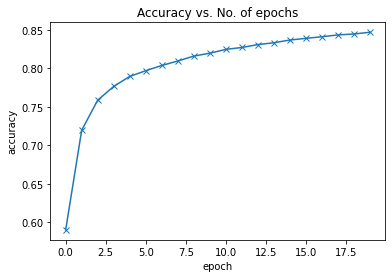

In [38]:
# Replace these values with your results
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Validation Accuracy vs. No. of epochs');

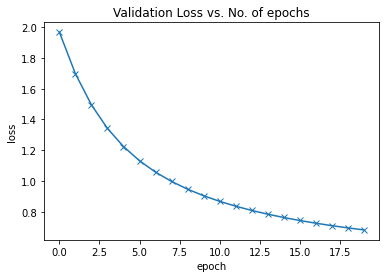

In [48]:
# Replace these values with your results
loss = [result['val_loss'] for result in history]
plt.plot(loss, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Validation Loss vs. No. of epochs');

In [39]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


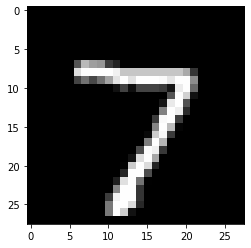

In [40]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [41]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [42]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


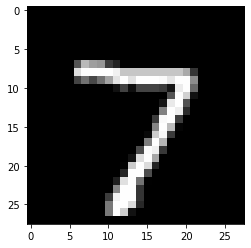

In [43]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


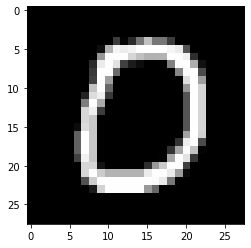

In [44]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 4


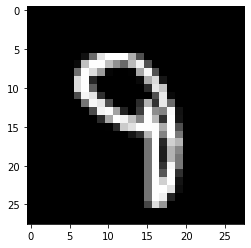

In [45]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


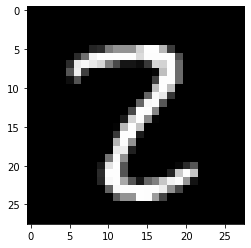

In [46]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [47]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_acc': 0.8592773675918579, 'val_loss': 0.6439559459686279}